# Microsoft Movie Studio Projest

## 1.Business Understanding

Microsoft has started a new movie studio and to know which movies do the best they have enlisted services of a data scientist.To come up with results that will enable the movie studio to make this decision, I as the data scientist will look at available resources such as the imdb to come up with observations and recommendations that are relevant to MIcrosoft

# 2.Data Understanding

For this operation we will be looking mainly at two sources of data namely the IMDb and The Box Office Mojo data which cointain alot of info on movies from cast all the way to budget

In [118]:
# below we will import all the libraries which will enable us to handle our data
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
sns.set_theme(style="darkgrid")


Since the data in IMDb is zipped it has to be unzipped first

In [119]:
# Unzip using zipfile
path = "zippedData/im.db.zip"
with zipfile.ZipFile(path, 'r') as zip_loc:
    zip_loc.extractall('zara')

Now we can open the the database using sqlite3

In [120]:
#Make a connection to the database
conn = sqlite3.connect("zara/im.db")

#USing pandas get the table names in the database
q ="""SELECT name 
      FROM sqlite_master 
      WHERE type = 'table'""";

pd.read_sql(q, conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


From the data base the most relevant tables to use are the movie_basics and movie_ratings.Lets take a look at the tables and familiarise ourselves with their content    

In [121]:
#Load the content of the table(columns and rows) from movie_basics
#Load the first 5 rows
pd.read_sql("""SELECT * FROM movie_basics;""", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [122]:
#Load the last 5 rows from movie_ratings
pd.read_sql("""SELECT * FROM movie_ratings;""", conn).tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


From the looks of it have one-to-one relationship on the movie_id column which seems to be the primary key in both



Now we look at the structure of the two tables

In [123]:
#use .info()
pd.read_sql("""SELECT * FROM movie_basics;""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [124]:
pd.read_sql("""SELECT * FROM movie_ratings;""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


We can also take a look at the descriptive ststistics of the tables

In [125]:
#Getting measures of central tendancies and dispersion
pd.read_sql("""SELECT * FROM movie_basics;""", conn).describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [126]:
pd.read_sql("""SELECT * FROM movie_ratings;""", conn).describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [127]:
#loking at the shape of the tables
basic = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
rate = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

print('The movie_basics table has ' + str(basic.shape[0]) + ' rows and ' + str(basic.shape[1]) + 'columns')
print('The movie_ratings table has ' + str(rate.shape[0]) + ' rows and ' + str(rate.shape[1]) + 'columns')

The movie_basics table has 146144 rows and 6columns
The movie_ratings table has 73856 rows and 3columns


Another source of data is The Box Office Mojo csv file.Repeat the same process above on the file

In [128]:
# Load the csv into a pandas dataframe 
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [129]:
#Looking at the structure of the data set 
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [130]:
#Getting thr drescriptive statistics of the dataset
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [131]:
print('The dataset has ' + str(bom.shape[0]) + ' rows and ' + str(bom.shape[1]) + ' columns')

The dataset has 3387 rows and 5 columns


Now that we know what our datasets contain and their features we can begin on cleaning it up for analysis

# 3.Data Cleaning

Checking for Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.
Data cleaning is necessary in order to ensure the accuracy of the final result of data analysis.To ensure this the consistency,quality and validity of the data has to be checked


The first step is checking if the datatypes of all the columns makes sense to our data

In [132]:
#For all datasets check columns Datatypes
basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [133]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [134]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


* As it can be seen above the foreign_gross column datatype is an object while it would be more relevant for it to be a float.Below the      datatypes will be changed

In [135]:
#strip the objects of an punctuation or white space and change
#the column type from object to float

bom['foreign_gross'] = bom['foreign_gross'].str.replace(',','').astype(float)

In [136]:
#Check to see if changes applied
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Duplicates Should as be checked for

In [137]:
#Identify datasets with with duplicates
print('The movies_basics has ' + str(basic.duplicated().sum()) + ' duplicates')
print('The movies_ratings has ' + str(rate.duplicated().sum()) + ' duplicates')
print('The Box Office Mojo dataset has ' + str(basic.duplicated().sum()) + ' duplicates')

The movies_basics has 0 duplicates
The movies_ratings has 0 duplicates
The Box Office Mojo dataset has 0 duplicates


Null values in your datasets can also have a major impact on the accuracy of data analysis and can make the recommendations misleading


Next check for null values in the datasets

In [138]:
#If any check for the number of null values in each column
basic.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [139]:
rate.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [140]:
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

* As it can be see above both the movie_basics table and the B.O.M dataset have missing values which have to be delt with
* To deal with the columns with a relatively small number of values, the rows with with those missing values in those respective columns can be droped.

In [141]:
#Drop the rows with missing values in the genre and original_title columns in the movie_ratings table 
basic = basic.dropna(subset= ['genres'])
basic = basic.dropna(subset= ['original_title'])

In [142]:
#Drop the rows with missing values in studio column in the B.O.M dataframe
bom.dropna(subset= ['studio'], inplace=True)

* For the remaining columns the process will be replacing the null values with the median of the values in the column
* The reason for this is because the median has less effect on the distribution of the data set

In [143]:
#Replace the null values in the domestic_gross and foreign_gross column with the column's median
bom['domestic_gross'].fillna(bom['domestic_gross'].median(), inplace=True)
bom['foreign_gross'].fillna(bom['foreign_gross'].median(), inplace=True)

In [144]:
#Replace the null values in the runtime_minutes column with the column's median
basic['runtime_minutes'].fillna(basic['runtime_minutes'].median(), inplace=True)

#

# 4.Data Analysis
* Now that we have cleaned our data to ensure its quality we can begin the analysis part of the project which will enable us to come up with recommendations that can best advice the decisions of the new movie studio

## 4.1.Univariate Data Analysis
* In this section the individual columns are the target analysis, the aim is to see the patterns inside each column 
* First column to look at is the genre column in the movie_basics table 

In [145]:
# Look for the unique values and the number of times they appear in the table
basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


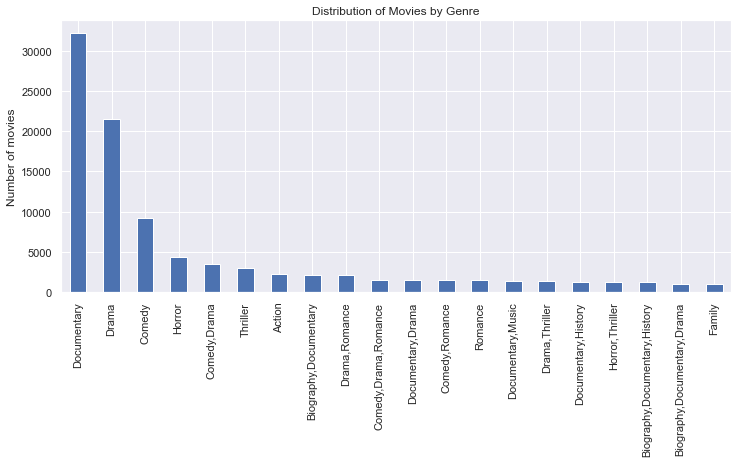

In [146]:
# Plot a barChart for the 20 most common movie genres
ax = basic['genres'].value_counts()[:20].plot(figsize = (12,5), kind= 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Number of movies")
# set the title
ax.set_title("Distribution of Movies by Genre");


* As it can be seen above the most common genre of movies is Documentaries followed by Dramas and so on.This can help the movie studio decide on the genre of movies they want to make based on the above observation
* Next we can look at the runtime_minutes column in movie_basics.This might give us an idea on how long movies made by the movie studio should be

In [147]:
# Get the descriptive statistics of the column 
print(basic['runtime_minutes'].describe())
print('The median value of the column is: ' + str(basic['runtime_minutes'].median()))
print('The mode value of the column is: ' + str(basic['runtime_minutes'].mode()[0]))
print('The range of the column is: ' + str(basic['runtime_minutes'].max() - basic['runtime_minutes'].min()))

count    140734.000000
mean         86.411109
std         149.934410
min           1.000000
25%          75.000000
50%          87.000000
75%          95.000000
max       51420.000000
Name: runtime_minutes, dtype: float64
The median value of the column is: 87.0
The mode value of the column is: 87.0
The range of the column is: 51419.0


* Above it can be seen that the data has a symmetrical distribution.The average length of most movies in the table is 86 minutes.It can also be seen from the standard deviation that the data is spread out from the mean indicating a high possibility of outliers.This indicates that a number of movies are longer than 86 minutes

Number of outliers in runtime_minutes: 12823


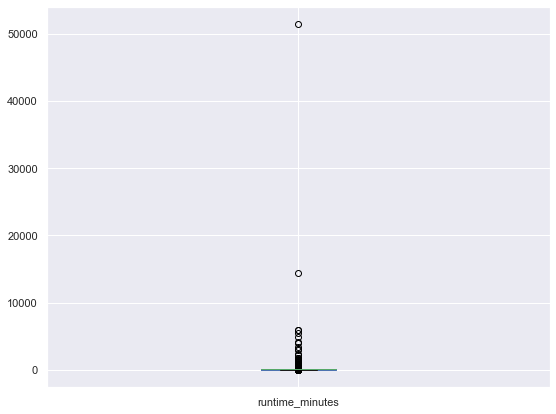

In [148]:
# Make a boxplot to see if they're any outliers
basic['runtime_minutes'].plot.box(figsize=(9,7))

# Find the number of outliers
tf = basic['runtime_minutes'].quantile(.25)
sf = basic['runtime_minutes'].quantile(.75)
IQR = sf - tf 
outliers = basic[(basic.runtime_minutes < tf - 1.5* IQR)  |
                    (basic.runtime_minutes > sf + 1.5 * IQR) ]
print('Number of outliers in runtime_minutes: ' + str(outliers.runtime_minutes.count()))

* As it can be seen the number of outliers is big and removing them will greatly disturb the distribution of the graph hence it would be more logical to keep them 

* Next we look at the B.O.M dataset columns which tell us how much money a movie grossed both domestically and in other countries

In [149]:
# look at the descriptive characteristics of the domestic_gross column
print('For domestic_gross column:\n' + str(bom['domestic_gross'].describe()))
print('The median value of the column is: ' + str(bom['domestic_gross'].median()))
print('The mode value of the column is: ' + str(bom['domestic_gross'].mode()[0]))
print('The range of the column is: ' + str(bom['domestic_gross'].max() - bom['domestic_gross'].min()) + '\n')

#look at the descriptive characteristics of the foreign_gross column
print('For foreign_gross column:\n' + str(bom['foreign_gross'].describe()))
print('The median value of the column is: ' + str(bom['foreign_gross'].median()))
print('The mode value of the column is: ' + str(bom['foreign_gross'].mode()[0]))
print('The range of the column is: ' + str(bom['foreign_gross'].max() - bom['foreign_gross'].min()))


For domestic_gross column:
count    3.382000e+03
mean     2.856106e+07
std      6.679161e+07
min      1.000000e+02
25%      1.230000e+05
50%      1.400000e+06
75%      2.767500e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64
The median value of the column is: 1400000.0
The mode value of the column is: 1400000.0
The range of the column is: 936699900.0

For foreign_gross column:
count    3.382000e+03
mean     5.251615e+07
std      1.101098e+08
min      6.000000e+02
25%      1.170000e+07
50%      1.870000e+07
75%      2.917500e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64
The median value of the column is: 18700000.0
The mode value of the column is: 18700000.0
The range of the column is: 960499400.0


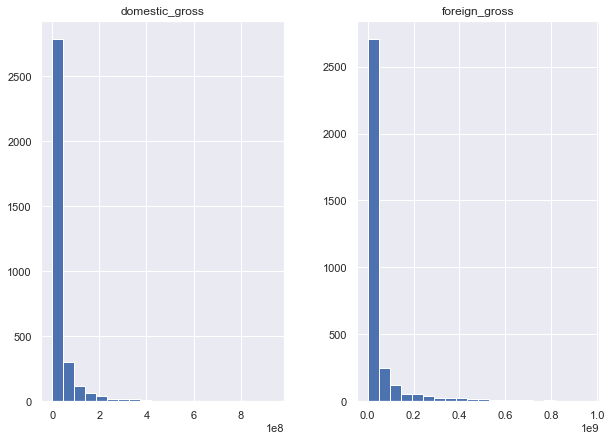

In [150]:
#Plot histograms and check skewed distribution of both columns
bom.hist(figsize= (10,7), column= ['domestic_gross','foreign_gross'], bins=20);

* The data above shows us that the domestic_gross column we see the descriptive statistics which are the mean, 25th percentile, maximum of the table values and so on.The standard deviation is high telling us the data has large spread from the mean.From the histogram we see it has a right skew distribution.This indicates that the most common domestic gross amount is less than the average
* Also for the foreign_gross column the descriptive statistics can be seen,the standard deviation is low telling us that the spread is minimal.The column also has a right skewed distribution also indicating that the most common foreign gross amount is less than the average gross amount

* The columns in the movie_ratings table can also be analyzed 

In [151]:
#Get averagerating descriptive characteristics
print('For averagerating column:\n' + str(rate['averagerating'].describe()))
print('The median value of the column is: ' + str(rate['averagerating'].median()))
print('The mode value of the column is: ' + str(rate['averagerating'].mode()[0]))
print('The range of the column is: ' + str(rate['averagerating'].max() - rate['averagerating'].min()) + '\n')

#Get numvotes descriptive characteristics
print('For numvotes column:\n' + str(rate['numvotes'].describe()))
print('The median value of the column is: ' + str(rate['numvotes'].median()))
print('The mode value of the column is: ' + str(rate['numvotes'].mode()[0]))
print('The range of the column is: ' + str(rate['numvotes'].max() - rate['numvotes'].min()) + '\n')

For averagerating column:
count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64
The median value of the column is: 6.5
The mode value of the column is: 7.0
The range of the column is: 9.0

For numvotes column:
count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64
The median value of the column is: 49.0
The mode value of the column is: 6
The range of the column is: 1841061



* From above data we can see that the averagerating column has a low stander deviation this can indicate presence of low number of outliers which can be removed from the dataset to get more logical descriptive analysis.This can be show in a box plot

In [152]:
#Check for outliers
Q1 = rate['averagerating'].quantile(.25)
Q3 = rate['averagerating'].quantile(.75)
IQR = Q3 - Q1 
outliers = rate[(rate['averagerating'] < Q1 - 1.5* IQR)  |
                    (rate['averagerating'] > Q3 + 1.5 * IQR) ]
print('Number of outliers in averagerating: ' + str(outliers.averagerating.count()))

Q_1 = rate['numvotes'].quantile(.25)
Q_3 = rate['numvotes'].quantile(.75)
IQR_ = Q_3 - Q_1
outliers = rate[(rate['numvotes'] < Q_1 - 1.5* IQR_)  |
                    (rate['numvotes'] > Q_3 + 1.5 * IQR_) ]
print('Number of outliers in numvotes: ' + str(outliers.numvotes.count()));

Number of outliers in averagerating: 1172
Number of outliers in numvotes: 11758


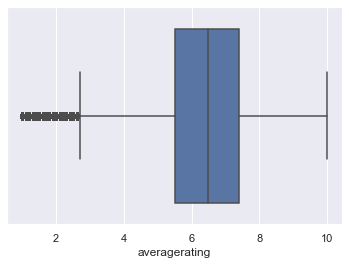

In [153]:
# Make a box plot to look for outliers for outliers in averagerating
sns.boxplot(x = rate['averagerating']);

In [154]:
#Remove the outliers
lower = Q1 - 1.5* IQR
upper = Q3 + 1.5 * IQR
rate= rate[(rate['averagerating'] > lower) & (rate['averagerating'] < upper)]

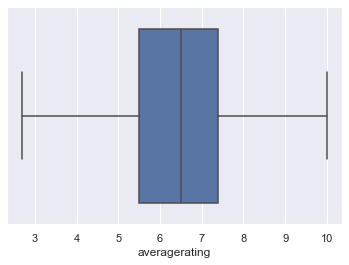

In [155]:
#Check if outliers removed
sns.boxplot(x = rate['averagerating']);

In [156]:
#Look at new descriptive characteristics
print('For averagerating column:\n' + str(rate['averagerating'].describe()))
print('The median value of the column is: ' + str(rate['averagerating'].median()))
print('The mode value of the column is: ' + str(rate['averagerating'].mode()[0]))
print('The range of the column is: ' + str(rate['averagerating'].max() - rate['averagerating'].min()) + '\n')

For averagerating column:
count    72684.000000
mean         6.401956
std          1.380133
min          2.700000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64
The median value of the column is: 6.5
The mode value of the column is: 7.0
The range of the column is: 7.3



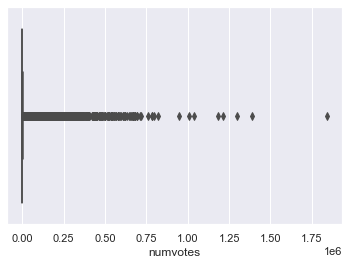

In [157]:

## Make a box plot to look for outliers for outliers in numvotes
sns.boxplot(x = rate['numvotes']);

* As it can be seen unlike the outliers in averagerating the ones in numvotes will have a hugr effect on the data if removed hence they will remain
* Below the distribution of the columns is diplayed 

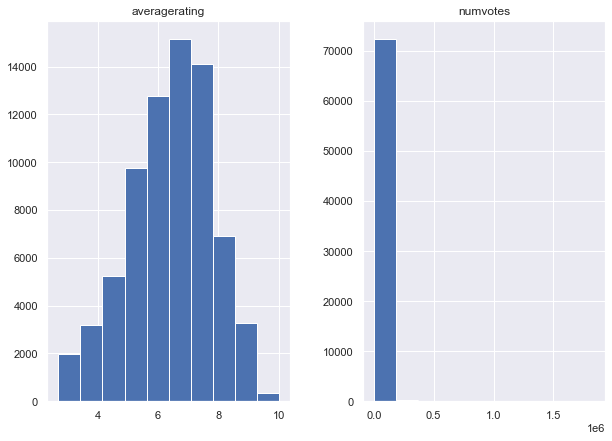

In [158]:
rate.hist(figsize= (10,7), column= ['averagerating','numvotes'], bins=10);

* It can be seen above that the averagerating column has slightly skewed distribution,hence most movies get ratings that are close 6.4
* For the numvotes column it has a right skewed distribution meaning most number of votes a movies get sre below the average this is due to the presence of movies with a very high number of votes(outliers)

## 4.2.Bivariate Data Analysis

* Now that we have seen the patterns in the individual columns we can begin looking at their relation if any
* In the B.O.M dataset a relation between its table can be looked for

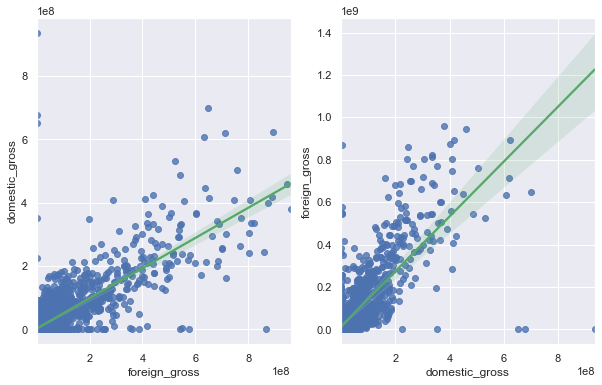

In [159]:
#Plot scatter plots with a regression module
domesticG = bom['domestic_gross']
foreignG = bom['foreign_gross']

fig, ax =plt.subplots(1,2, figsize= (10,6))
sns.regplot(x= foreignG, y= domesticG, line_kws={'color': 'g'}, ax= ax[0])
sns.regplot(x= domesticG, y= foreignG, line_kws={'color': 'g'}, ax= ax[1]);

In [160]:
#Check the correlation
correlation = domesticG.corr(foreignG, method= 'pearson')
print('Pearson coefficient of domestic_gross and foreign_gross is: ' + str(correlation))

Pearson coefficient of domestic_gross and foreign_gross is: 0.7840594568087651


* As it can be seen above from both the scatter plot, regression line and the pearson coefficient that the two tables have a strong positive correlation.It can also be seen that the slope in the second plot is steeper than the slope of the first plot.This indicates that movies that earn a higher domestic gross earn foreign gross at faster rate

* Below we can take a look at the relation in the ratings table between its tables

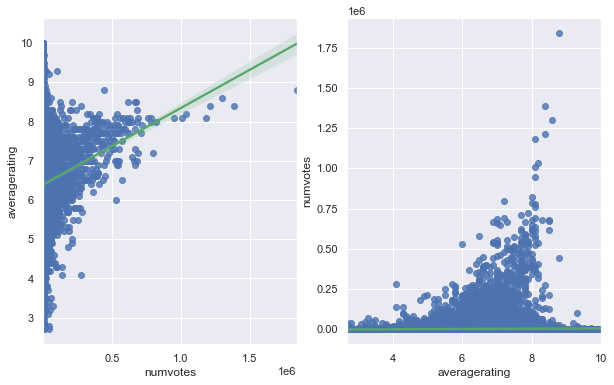

In [161]:
#Plot scatter plots with a regression module
ratings = rate['averagerating']
votes = rate['numvotes']
fig, ax =plt.subplots(1,2, figsize= (10,6))
sns.regplot(x= votes, y= ratings, line_kws={'color': 'g'}, ax= ax[0])
sns.regplot(x= ratings, y= votes, line_kws={'color': 'g'}, ax= ax[1]);

In [162]:
#Check the correlation
coefficient = ratings.corr(votes, method= 'pearson')
print('Pearson coefficient of votes and ratings is: ' + str(coefficient))

Pearson coefficient of votes and ratings is: 0.04310089637963958


* From the scatter plot and pearsons coefficient the ratings and number of votes of movies have a weak positive correlation.It can be seen in the first plot that a majority of movie ratings are determined by a low number of votes, but movies who have a high number of votes generally have a rating above 5.
 
 * Since both movie_basics and movie_ratings tables are on the same database we can see they share a one-to-one relationship on the movie_id column, which seems to be the primary key in both table
 * Presence of a key will enable us to merge the two tables together so we can see the relation between the different columns.This will we done on the shared primary on a left join since movie_ratings has less records compared to movie_basics

In [163]:
#Merge the tables
ratings_and_basics = pd.merge(rate, basic, how="left", on= 'movie_id')

* The relationship between the genres and number of votes can be found by grouping them into a seperate dataframe 

In [164]:
#Look for the genres with the least number of votes
bottom_20 = ratings_and_basics.groupby('genres', as_index= False)['numvotes'].sum().sort_values('numvotes', ascending= False).tail(20)
bottom_20

,genres,numvotes
833,Game-Show,7
264,"Adventure,Romance,Sci-Fi",6
243,"Adventure,Fantasy,War",6
414,"Biography,History,Music",6
279,"Animation,Biography,Fantasy",6
645,"Documentary,History,Musical",6
358,"Animation,Western",6
812,"Fantasy,Horror,Music",6
217,"Adventure,Drama,Musical",6
342,"Animation,Horror,Romance",6



# 5.Conclusion

* From the data analysis carried out on the data available to us some conclusions can be derived from our observations
<ol>
   <li>The 20 most common movie genres are:Documentary , Drama , Comedy , Horror , Comedy,Drama , Thriller , Action , Biography,Documentary , DramaRomance Comedy,Drama,Romance , Documentary,Drama , Comedy,Romance , Romance , Documentary,Music , Drama,Thriller , Documentary,History , HorrorThriller , Biography,Documentary,History , Biography,Documentary,Drama , Family</li>
   <li>The average length of a movie is 86 minutes but a number of movies tend to be longer or short </li>
   <li>For both domestic gross majority of movies get less than the average gross amount</li>
   <li>Movies that a large domestic gross amount have larger foreign gross amount compared to movies with small domestic gross amount</li>
   <li>Majority of movies get a rating of 6</li> 
   <li>Majority of the average numbrer of votes are low numbers</li>  
   <li>Majority of movie ratings are determined by a low number of votes</li>
   <li>The genres with the least number of number of results can be found in 4.2 section</li> 
</ol>   


# 5.Recommendations

* My recommendations to the new movie studio are:
     <ol>
        <li>Genres of the movies should be selected from the most common genres and genres that get the most average votes</li>
        <li>The length of the movies should be more than average 86 minutes</li>
        <li>The movies made should target the domestic market although higher income comes from foreign</li>
        <li>Genres with a low number of average votes should be avoided since this may indicate a small audience</li>


# 6.Next Step 
* If more analysis is done genres which are liked more by the domestic market can be identified
* Popularities of movies can also be based of the actors present in the movie
* The average spending amount to make certain genre movies
* Comparing amount spent on a movie and amount returned